### Videos Summary 
_____
Summary information for trending videos dataset

In [676]:
import pandas as pd
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import numpy as np

#nltk.download('punkt')
#nltk.download('stopwords')

from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer

%matplotlib inline

In [573]:
columns =  ['views', 'likes', 'dislikes', 'comment_count', 'trending_date', 'category_name', 'duration', 'tags', 'tags_rate']

trends = pd.read_csv('../../../../resources/datasets/USvideos.csv', parse_dates=['publish_time'], index_col='video_id')
duration = pd.read_csv('../../../../resources/datasets/USvideos_duration.csv',usecols=['video_id', 'duration'], index_col='video_id')
sentimental = pd.read_csv('../../../../resources/datasets/US_sentimental.csv', index_col='video_id')

df = pd.merge(trends, duration, how='outer', on=['video_id'])
df = df.merge(sentimental, how='outer', on=['video_id'])

df.head(5)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,...,description,duration,title_negative,title_neutral,title_positive,title_rate,tags_negative,tags_neutral,tags_positive,tags_rate
video_id,,,,,,,,,,,,,,,,,,,,,
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,...,SHANTELL'S CHANNEL - https://www.youtube.com/s...,678,0.0,82.2,17.8,Positive,0.0,100.0,0.0,Neutral
2kyS6SvSYSE,17.15.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,2188590,88099,7150,24225,...,SHANTELL'S CHANNEL - https://www.youtube.com/s...,678,0.0,82.2,17.8,Positive,0.0,100.0,0.0,Neutral
2kyS6SvSYSE,17.16.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,2325233,91111,7543,21450,...,SHANTELL'S CHANNEL - https://www.youtube.com/s...,678,0.0,82.2,17.8,Positive,0.0,100.0,0.0,Neutral
2kyS6SvSYSE,17.17.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,2400741,92831,7687,21714,...,SHANTELL'S CHANNEL - https://www.youtube.com/s...,678,0.0,82.2,17.8,Positive,0.0,100.0,0.0,Neutral
2kyS6SvSYSE,17.18.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,2468267,94303,7802,21866,...,SHANTELL'S CHANNEL - https://www.youtube.com/s...,678,0.0,82.2,17.8,Positive,0.0,100.0,0.0,Neutral


#### Data Cleanup
____________________

In [574]:
# import category description
category_file = '../../../../resources/datasets/US_category_id.json'

map_category = {}
with open(category_file) as jsonfile:
    categories = json.load(jsonfile)
    
for item in categories['items']:
    map_category[int(item['id'])] = item["snippet"]["title"]

df['category_name'] = df['category_id'].map(map_category)
df['category_name'] = df['category_name'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40949 entries, 2kyS6SvSYSE to yz7Xq3T0YPs
Data columns (total 25 columns):
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null datetime64[ns]
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
duration                  40949 non-null int64
title_negative            40949 non-null float64
title_neutral             40949 non-null float64
title_positive    

In [575]:
# fix trendind_date field
df['trending_date'] = df['trending_date'].apply(lambda dt: datetime.datetime.strptime(dt, '%y.%d.%m'))

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40949 entries, 2kyS6SvSYSE to yz7Xq3T0YPs
Data columns (total 25 columns):
trending_date             40949 non-null datetime64[ns]
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null datetime64[ns]
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
duration                  40949 non-null int64
title_negative            40949 non-null float64
title_neutral             40949 non-null float64
title_posi

In [576]:
# Considering only the last record for each video for the summary analysis. 
df_unique = df[columns].sort_values(by='trending_date',ascending=False).groupby(by='video_id').first()

df_unique.head(5)

,views,likes,dislikes,comment_count,trending_date,category_name,duration,tags,tags_rate
video_id,,,,,,,,,
-0CMnp02rNY,800359,9773,332,423,2018-06-11,Entertainment,308,"ellen|""ellen degeneres""|""the ellen show""|""elle...",Positive
-0NYY8cqdiQ,563746,4429,54,94,2018-02-01,Entertainment,303,"megan mullally|""megan""|""mullally""|""will and gr...",Positive
-1Hm41N0dUs,2058516,41248,580,1484,2018-05-01,Comedy,237,"jimmy|""jimmy kimmel""|""jimmy kimmel live""|""late...",Positive
-1yT-K3c6YI,231341,7734,212,846,2017-12-02,People & Blogs,999,"youtube quiz|""youtuber quiz""|""truth or dare""|""...",Positive
-2RVw2_QyxQ,71089,460,27,20,2017-11-16,Education,20767,"Chess|""Saint Louis""|""Club""",Neutral


#### 1. Videos Summary
_____
Estimate the numbers of people a campaign could reach

In [577]:
total_videos = df_unique.shape[0]

max_views = df_unique['views'].max()
avg_views = df_unique['views'].mean()
min_views = df_unique['views'].min()
std_views = df_unique['views'].std()

summary_data = [{
    'Total of Videos'    : total_videos,
    'Max of Views'       : max_views,
    'Average of Views'   : avg_views,
    'Minimum of Views'   : min_views,
    'Standard Deviation' : std_views
}]

videos_summary = pd.DataFrame(data=summary_data, columns=list(summary_data[0].keys()))
videos_summary['Total of Videos'] = videos_summary['Total of Videos'].map('{:,}'.format)
videos_summary['Max of Views'] = videos_summary['Max of Views'].map('{:,}'.format)
videos_summary['Average of Views'] = videos_summary['Average of Views'].map('{:,.0f}'.format)
videos_summary['Minimum of Views'] = videos_summary['Minimum of Views'].map('{:,.0f}'.format)
videos_summary['Standard Deviation'] = videos_summary['Standard Deviation'].map('{:,.0f}'.format)

videos_summary

,Total of Videos,Max of Views,Average of Views,Minimum of Views,Standard Deviation
0,"6,351","225,211,923","1,962,117",559,"7,060,057"


#### 2. Views per Category
______

Identity the performance of the categories areas

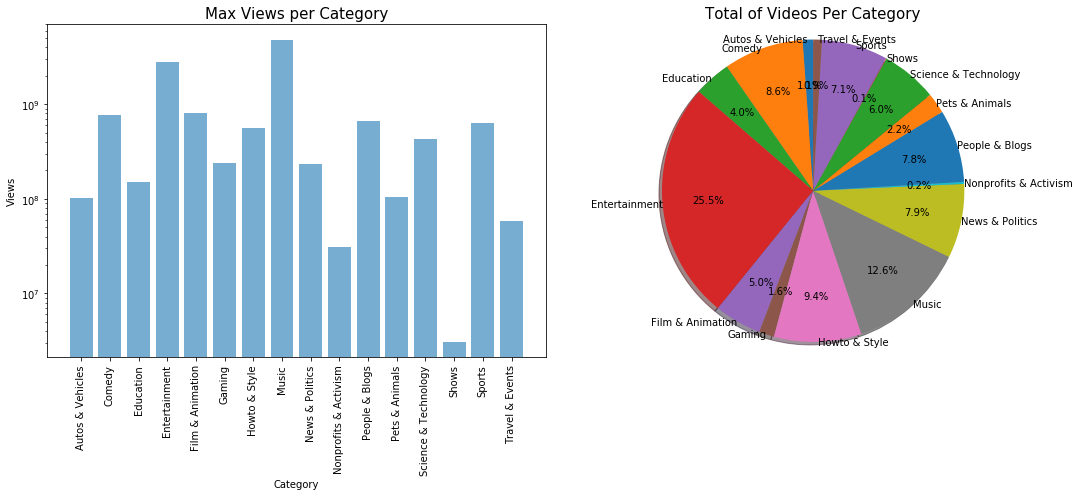

In [578]:
df_category = df_unique[['category_name', 'views']].groupby(by='category_name', as_index=False).agg({'views' : ['count', 'sum']})

fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.bar(df_category['category_name'], df_category['views']['sum'],align="center", alpha=0.6, orientation='vertical',log=True)
ax1.set_title('Max Views per Category', fontsize=15)
ax1.set_xlabel('Category')
ax1.set_ylabel('Views')
ax1.set_xticklabels(df_category['category_name'], rotation='vertical')
ax1.set_xlim(auto=True)
ax1.set_ylim(auto=True)


ax2.pie(x=df_category['views']['count'], labels=df_category['category_name'], shadow=True, startangle=90, autopct='%1.1f%%',labeldistance=1.0,pctdistance=0.7)
ax2.set_title('Total of Videos Per Category', fontsize=15)
ax2.axis('equal')
ax2.set_xlim(auto=True)
ax2.set_ylim(auto=True)

plt.tight_layout()
plt.show()

#### 2. Distribution per Category
______

Identity how the numbers of views is distribute accross the categories

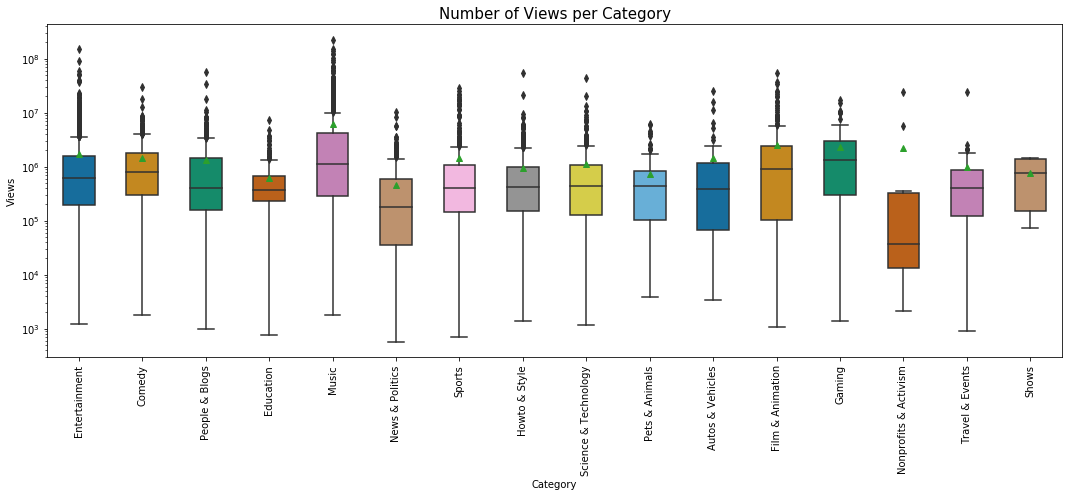

In [579]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(1, 1, 1)

ax = sns.boxplot(x=df_unique['category_name'], y=df_unique['views'], width=0.5,palette="colorblind", data=df_unique,showfliers=True,showmeans=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

ax.set_xlim(auto=True)
ax.set_ylim(auto=True)

ax.set_title('Number of Views per Category', fontsize=15)
ax.set_xlabel('Category')
ax.set_ylabel('Views')
ax.set_yscale('log')


plt.tight_layout()
plt.show()

#### 3. Correlation accross categories
_____
Observe the correlation between Views, Like, Dislikes, Comments, Duration

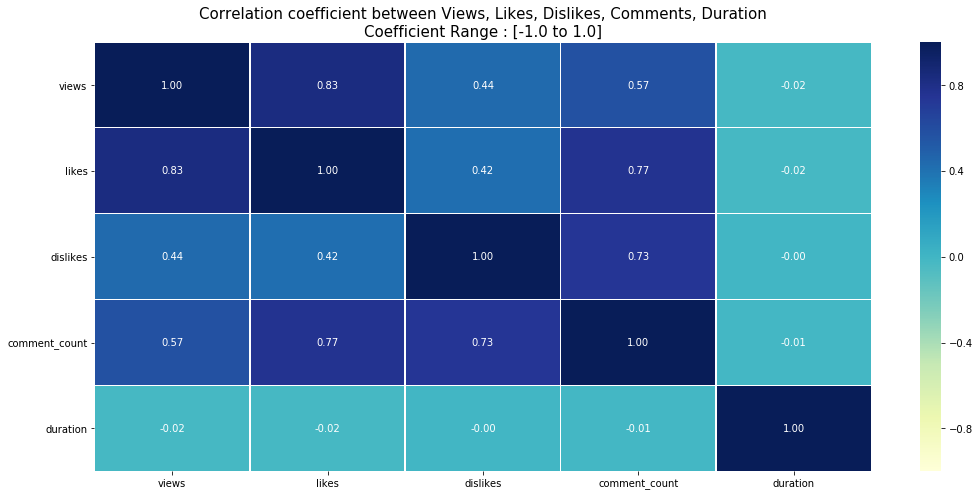

In [580]:
columns = ['views', 'likes', 'dislikes', 'comment_count', 'duration']
df_corr = df_unique[columns].corr()

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(1, 1, 1)

ax.set_title('Correlation coefficient between Views, Likes, Dislikes, Comments, Duration\nCoefficient Range : [-1.0 to 1.0]', fontsize=15)

ax = sns.heatmap(df_corr, annot=True, fmt='.2f',vmin=-1.0, vmax=1.0, cmap='YlGnBu', center=0, linewidths=.5)

plt.tight_layout()
plt.show()

#### 4. Ratios per Categories
______________


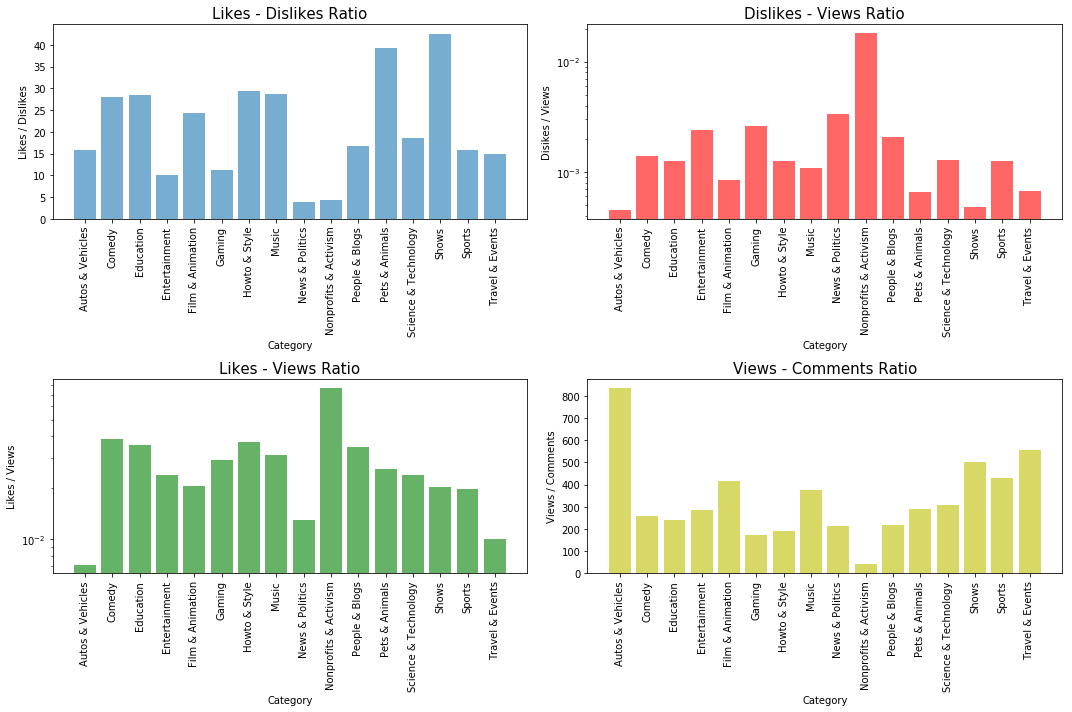

In [581]:
df_ratio = df_unique.groupby(by='category_name',as_index=False).agg({
    'likes'         : ['sum'],
    'dislikes'      : ['sum'],
    'views'         : ['sum'],
    'comment_count' : ['sum']
})

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)


ax1.bar(df_ratio['category_name'], df_ratio['likes']['sum'] / df_ratio['dislikes']['sum'],align="center", alpha=0.6, orientation='vertical',log=False)
ax1.set_title('Likes - Dislikes Ratio', fontsize=15)
ax1.set_xlabel('Category')
ax1.set_ylabel('Likes / Dislikes')
ax1.set_xticklabels(df_ratio['category_name'], rotation='vertical')
ax1.set_xlim(auto=True)
ax1.set_ylim(auto=True)


ax2.bar(df_ratio['category_name'], df_ratio['dislikes']['sum'] / df_ratio['views']['sum'],align="center", alpha=0.6, orientation='vertical',log=True, color='r')
ax2.set_title('Dislikes - Views Ratio', fontsize=15)
ax2.set_xlabel('Category')
ax2.set_ylabel('Disikes / Views')
ax2.set_xticklabels(df_ratio['category_name'], rotation='vertical')
ax2.set_xlim(auto=True)
ax2.set_ylim(auto=True)

ax3.bar(df_ratio['category_name'], df_ratio['likes']['sum'] / df_ratio['views']['sum'],align="center", alpha=0.6, orientation='vertical',log=True, color='g')
ax3.set_title('Likes - Views Ratio', fontsize=15)
ax3.set_xlabel('Category')
ax3.set_ylabel('Likes / Views')
ax3.set_xticklabels(df_ratio['category_name'], rotation='vertical')
ax3.set_xlim(auto=True)
ax3.set_ylim(auto=True)

ax4.bar(df_ratio['category_name'], df_ratio['views']['sum'] / df_ratio['comment_count']['sum'],align="center", alpha=0.6, orientation='vertical',log=False, color='y')
ax4.set_title('Views - Comments Ratio', fontsize=15)
ax4.set_xlabel('Category')
ax4.set_ylabel('Views / Comments')
ax4.set_xticklabels(df_ratio['category_name'], rotation='vertical')
ax4.set_xlim(auto=True)
ax4.set_ylim(auto=True)

plt.tight_layout()

plt.show()

#### 5. Tags
______________
Top tags used per category

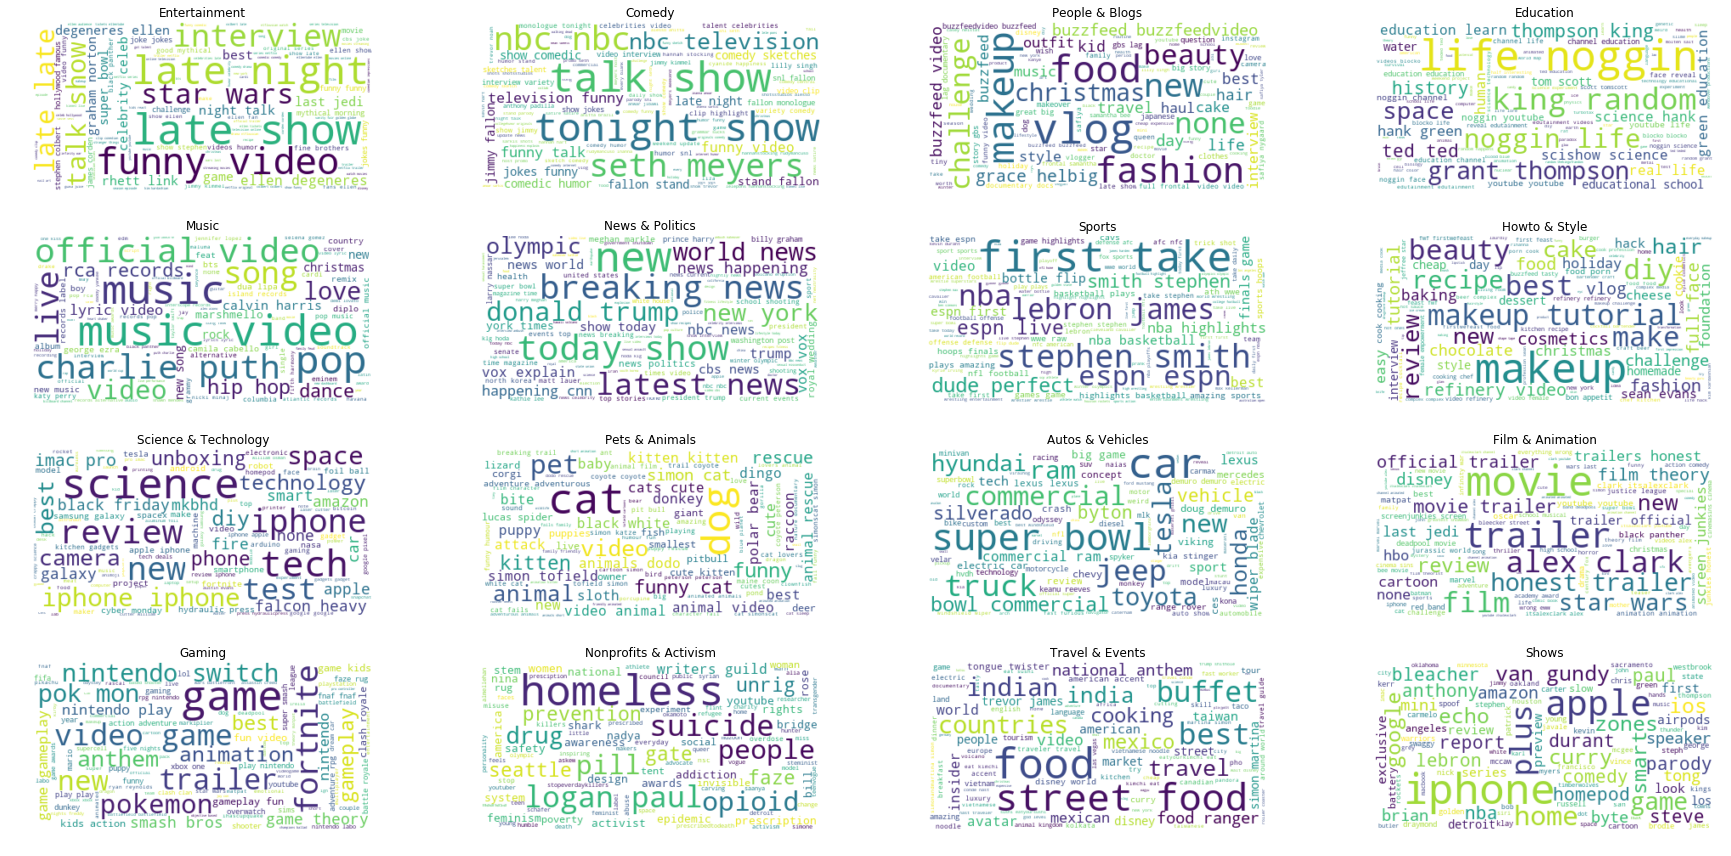

In [582]:
fig = plt.figure(figsize=(25, 12))
stopwords_list = list(stopwords.words('english'))

def normalize_data(tag):    
    tag_word = tag.str.lower().str.cat(sep=' ')
    tag_word = re.sub('[^A-Za-z]+', ' ', tag_word)
    tokens = word_tokenize(tag_word)
    filter_sentence = [word for word in tokens if not word in stopwords_list]
    filter_one_chr = [word for word in filter_sentence if len(word) > 2]
    
    return [word for word in filter_one_chr if not word.isdigit()]
    
def plot_word_cloud(word_data, x, y, i, title):
    ax = fig.add_subplot(x, y, i)
    
    cloud = WordCloud(background_color = 'white', max_words = 100,  max_font_size = 50)
    cloud.generate(' '.join(word_data))
    
    ax.imshow(cloud,interpolation='bilinear')
    ax.set_title(label=title)
    ax.axis('off')

index = 1

for category in df_unique['category_name'].unique():    
    cond = df_unique['category_name'] == category
    plot_word_cloud(normalize_data(df_unique[cond]['tags']), 4,4, index, category)
    index = index + 1
    
plt.tight_layout()
plt.show()    

#### 6. Sentimental Analysis
______________

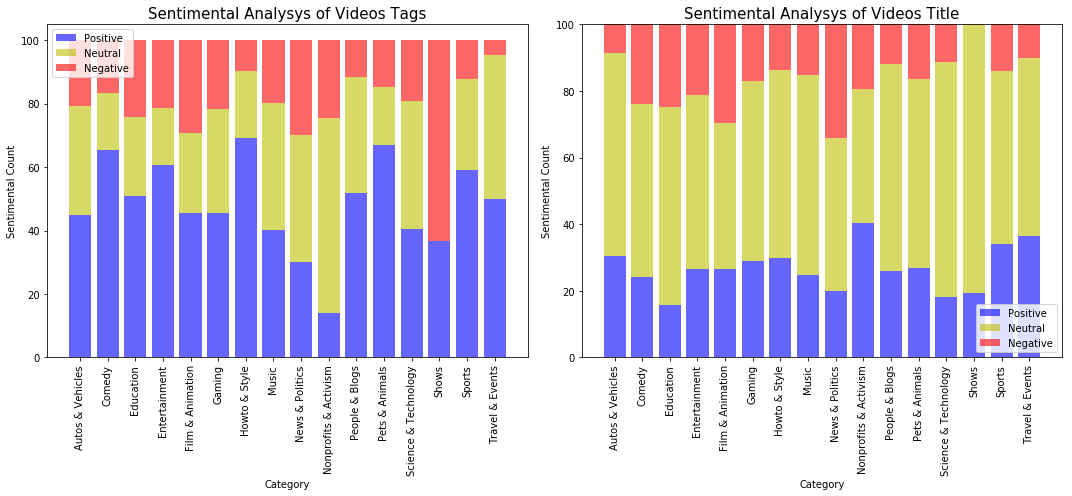

In [797]:
df_sentimental = df[['category_name','tags_rate', 'views']].groupby(by=['tags_rate', 'category_name'], as_index=False).count()

cond1 = df_sentimental['tags_rate'] == 'Positive'
cond2 = df_sentimental['tags_rate'] == 'Neutral'
cond3 = df_sentimental['tags_rate'] == 'Negative'

df_positive = df_sentimental[cond1][['category_name', 'views']] 
df_positive.set_index(keys=['category_name'], inplace=True)
df_positive.fillna(value=0, inplace=True)

df_neutral = df_sentimental[cond2][['category_name', 'views']] 
df_neutral.set_index(keys=['category_name'], inplace=True)
df_neutral.fillna(value=0, inplace=True)

df_negative = df_sentimental[cond3][['category_name', 'views']] 
df_negative.set_index(keys=['category_name'], inplace=True)
df_negative.fillna(value=0, inplace=True)

df_total = df_positive + df_neutral + df_negative

df_total['perc_positive'] = (df_positive['views'] / df_total['views'])*100
df_total['perc_neutral'] = (df_neutral['views'] / df_total['views'])*100
df_total['perc_negative'] = (df_negative['views'] / df_total['views'])*100
df_total.reset_index(drop=False, inplace=True)

fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 2, 1)

ax1.bar(df_total['category_name'], df_total['perc_positive'], align="center", width=0.8, alpha=0.6, orientation='vertical',log=False, label='Positive', color='b')
ax1.bar(df_total['category_name'], df_total['perc_neutral'], align="center", width=0.8, alpha=0.6, orientation='vertical',log=False, label='Neutral', color='y', bottom=df_total['perc_positive'])
ax1.bar(df_total['category_name'], df_total['perc_negative'], align="center", width=0.8, alpha=0.6, orientation='vertical',log=False, label='Negative', color='r', bottom=df_total['perc_positive']+df_total['perc_neutral'])

ax1.set_title('Sentimental Analysys of Videos Tags', fontsize=15)
ax1.set_xlabel('Category')
ax1.set_ylabel('Sentimental Count')
ax1.set_xticklabels(df_total['category_name'], rotation='vertical')
ax1.set_xlim(auto=True)
ax1.set_ylim(auto=True)
ax1.legend()


df_sentimental_title = df[['category_name','title_rate', 'views']].groupby(by=['title_rate', 'category_name'], as_index=False).count()

cond1 = df_sentimental_title['title_rate'] == 'Positive'
cond2 = df_sentimental_title['title_rate'] == 'Neutral'
cond3 = df_sentimental_title['title_rate'] == 'Negative'

df_positive_title = df_sentimental_title[cond1][['category_name', 'views']] 
df_positive_title.set_index(keys=['category_name'], inplace=True)
df_positive_title.fillna(value=0, inplace=True)

df_neutral_title = df_sentimental_title[cond2][['category_name', 'views']] 
df_neutral_title.set_index(keys=['category_name'], inplace=True)
df_neutral_title.fillna(value=0, inplace=True)

df_negative_title = df_sentimental_title[cond3][['category_name', 'views']] 
df_negative_title.set_index(keys=['category_name'], inplace=True)
df_negative_title.fillna(value=0, inplace=True)

df_total_title = df_positive_title + df_neutral_title + df_negative_title

df_total_title['perc_positive'] = (df_positive_title['views'] / df_total_title['views'])*100
df_total_title['perc_neutral'] = (df_neutral_title['views'] / df_total_title['views'])*100
df_total_title['perc_negative'] = (df_negative_title['views'] / df_total_title['views'])*100
df_total_title.reset_index(drop=False, inplace=True)

ax2 = fig.add_subplot(1, 2, 2)

ax2.bar(df_total_title['category_name'], df_total_title['perc_positive'], align="center", width=0.8, alpha=0.6, orientation='vertical',log=False, label='Positive', color='b')
ax2.bar(df_total_title['category_name'], df_total_title['perc_neutral'], align="center", width=0.8, alpha=0.6, orientation='vertical',log=False, label='Neutral', color='y', bottom=df_total_title['perc_positive'])
ax2.bar(df_total_title['category_name'], df_total_title['perc_negative'], align="center", width=0.8, alpha=0.6, orientation='vertical',log=False, label='Negative', color='r', bottom=df_total_title['perc_positive']+df_total_title['perc_neutral'])

ax2.set_title('Sentimental Analysys of Videos Title', fontsize=15)
ax2.set_xlabel('Category')
ax2.set_ylabel('Sentimental Count')
ax2.set_xticklabels(df_total['category_name'], rotation='vertical')
ax2.set_xlim(auto=True)
ax2.set_ylim(auto=True)
ax2.legend()

plt.tight_layout()
plt.show()

In [572]:
#df[columns].groupby(by='video_id').sum().to_csv('data.csv')
df.to_csv('data.csv')

#### 1. Videos Summary

In [26]:
total_videos = df['video_id'].nunique()

df[columns].groupby(by='video_id').mean()

#print (total_videos)

,views,likes,comment_count
video_id,,,
-0CMnp02rNY,6.891170e+05,8699.500000,369.166667
-0NYY8cqdiQ,5.637460e+05,4429.000000,94.000000
-1Hm41N0dUs,1.835892e+06,37388.333333,1462.000000
-1yT-K3c6YI,1.943108e+05,6826.250000,732.000000
-2RVw2_QyxQ,6.943467e+04,450.333333,20.666667
-2aVkGcI7ZA,1.668644e+06,29818.000000,732.000000
-2b4qSoMnKE,1.881985e+05,2616.000000,2351.500000
-2wRFv-mScQ,8.928958e+05,11705.750000,656.500000
-35jibKqbEo,1.476342e+06,104394.750000,7598.000000
